Question 1 (10 points):
To start, make a new jupyter notebook called lab5_submission.ipynb and work through the following tasks.

The first task is answer the following questions using some of the methods we have covered in the lecture/demo.

How many houses are in this dataset?
How many features are there for predicting house price?
Are there any null values in this dataset?
Which three variables are best correlated with house price (include correlation coefficients)?
Which three variables are least correlated with house price (include correlation coefficients)?

Seattle dataset

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from shapely.geometry import Point

In [2]:
# Import data
df = pd.read_csv('C:/Users/zenon/Documents/GitHub/geospatial-data-science/labs/lab5/data/california_house_prices.csv')

# Read dataset
coast = gpd.read_file('C:/Users/zenon/Documents/GitHub/geospatial-data-science/labs/lab5/data/california_coastline.shp')

In [3]:
# Read dataset
coast = gpd.read_file('C:/Users/zenon/Documents/GitHub/geospatial-data-science/labs/lab5/data/washington_coastline.shp')

In [4]:
# Convert DataFrame to GeoDataFrame
gdf = gpd.GeoDataFrame(df, geometry=gpd.points_from_xy(df['longitude'], df['latitude']))
gdf = gdf.set_crs(4326, allow_override=True)

# Reproject everything to UTM 10N (EPSG:32610)
gdf_utm = gdf.to_crs('EPSG:32610')
coast_utm = coast.to_crs('EPSG:32610')

In [5]:
#distance
sea = pd.read_csv('C:/Users/zenon/Documents/GitHub/geospatial-data-science/labs/lab5/data/' + "seattle_house_prices.csv")
sea_gdf = gpd.GeoDataFrame(sea, geometry = gpd.points_from_xy(sea['long'], sea['lat']))
sea_gdf = sea_gdf.set_crs(4326, allow_override=True)
# Reproject everything to UTM 10N (EPSG:32610)
sea_utm = sea_gdf.to_crs('EPSG:32610')

rand_point = Point(-122.30346608381247, 47.65707559497503)
rand_gdf = gpd.GeoDataFrame(geometry = [rand_point])
rand_gdf = rand_gdf.set_crs(4326)
rand_gdf_utm = rand_gdf.to_crs(32610)
dist_sea_rand_pnt = []
for i in range(sea_utm.shape[0]):
    dist_sea_rand_pnt.append(rand_gdf_utm.distance(sea_utm['geometry'].iloc[i]).min())
    


In [6]:
sea_utm['dist_to_uofw'] = dist_sea_rand_pnt

In [7]:
# Compute distance to coast
distance_to_coast = []
for i in range(sea_utm.shape[0]):
    distance_to_coast.append(coast_utm.distance(sea_utm['geometry'].iloc[i]).min())
    
# Add to DataFrame
sea_utm['distance_to_coast'] = distance_to_coast

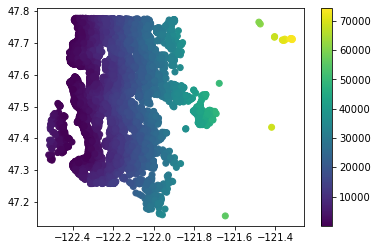

In [8]:
# Quickly check that it worked!
plt.scatter(sea_utm['long'], sea_utm['lat'], c=sea_utm['distance_to_coast'])
plt.colorbar()

In [9]:
# Read dataset
# df = pd.read_csv('data/seattle_house_prices.csv')

# Examine dataset (each row represents one block group)
sea_utm.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'yr_built',
       'lat', 'long', 'geometry', 'dist_to_uofw', 'distance_to_coast'],
      dtype='object')

In [10]:
houses = len(sea)
houses

19451

there are 19451 houses in the dataset

In [11]:
sea.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19451 entries, 0 to 19450
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   price        19451 non-null  int64   
 1   bedrooms     19451 non-null  int64   
 2   bathrooms    19451 non-null  float64 
 3   sqft_living  19451 non-null  int64   
 4   sqft_lot     19451 non-null  int64   
 5   yr_built     19451 non-null  int64   
 6   lat          19451 non-null  float64 
 7   long         19451 non-null  float64 
 8   geometry     19451 non-null  geometry
dtypes: float64(3), geometry(1), int64(5)
memory usage: 1.3 MB


there are 6 features that would predict housing price: bedrooms, bathrooms, square foot living space, square foot lot space, year built, and location

In [12]:
(sea.isnull().sum (axis = 0))

price          0
bedrooms       0
bathrooms      0
sqft_living    0
sqft_lot       0
yr_built       0
lat            0
long           0
geometry       0
dtype: int64

 there are no null values in any columns of the data set 

In [13]:
# Rooms per house
#sea_utm['rooms_per_house'] = sea_utm['total_rooms'] / sea_utm['households']

# Bedrooms per house
#sea_utm['bedrooms_per_room'] = sea_utm['total_bedrooms'] / sea_utm['total_rooms']

# SqFT per latitude

sea_utm['lat_per_sqft'] = sea_utm['lat'] / sea_utm['sqft_living']

sea_utm['bedrooms_per_unitdist_to_uofw'] = sea_utm['bedrooms'] / sea_utm['dist_to_uofw']

sea_utm['bedrooms_per_sqft'] = sea_utm['bedrooms'] / sea_utm['sqft_living']

sea_utm['bathrooms_per_sqft'] = sea_utm['bathrooms'] / sea_utm['sqft_living']

sea_utm['sqft_per_lat'] = sea_utm['sqft_living'] / sea_utm['lat']

In [14]:
# Compute correlation matrix
corr_matrix = sea_utm.corr()

# Display just house value correlations
corr_matrix["price"].sort_values(ascending= False)

price                            1.000000
sqft_living                      0.702296
sqft_per_lat                     0.700293
bathrooms                        0.524395
bedrooms_per_unitdist_to_uofw    0.340093
bedrooms                         0.315804
lat                              0.308082
sqft_lot                         0.090125
yr_built                         0.052453
distance_to_coast                0.027830
long                             0.020092
bathrooms_per_sqft              -0.267342
dist_to_uofw                    -0.341399
bedrooms_per_sqft               -0.479228
lat_per_sqft                    -0.494579
Name: price, dtype: float64

The top 3 highest correlated variables to price are square foot living area, bathrooms, and bedrooms. (Before addition of created variables.)

The 3 lowest correlated variables to price are longitude, year built, and square feet of the lot. (Before addition of created variables.)

In [48]:
# Define feature list
feature_list =  ['sqft_living','sqft_per_lat', 'bathrooms', 'bedrooms_per_unitdist_to_uofw', 'bedrooms', 
                 'lat', 'sqft_lot', 'yr_built', 'distance_to_coast', 'long', 'bathrooms_per_sqft', 'dist_to_uofw', 'bedrooms_per_sqft', 'lat_per_sqft']

# Define features and labels 
X = sea_utm[feature_list]
y = sea_utm['price']

# Standarize data
scaler = StandardScaler()  
X_scaled = scaler.fit_transform(X)

In [58]:
# Split data 
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [59]:
# Define model
forest_reg = RandomForestRegressor(n_estimators = 30)

# Fit model
forest_reg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=30)

In [60]:
# Predict test labels predictions
predictions = forest_reg.predict(X_test)

# Compute mean-squared-error
final_mse = mean_squared_error(y_test , predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

151651.2976823665

(0.0, 500000.0)

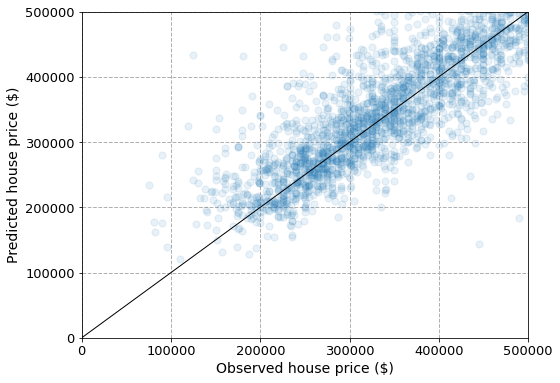

In [34]:
# Plot
fig, ax = plt.subplots(figsize=(8, 6))
ax.scatter(y_test, predictions, alpha=0.1, s=50, zorder=2)
ax.plot([0,500000], [0, 500000], color='k', lw=1, zorder=3)
ax.set_ylabel('Predicted house price ($)', fontsize=14)
ax.set_xlabel('Observed house price ($)', fontsize=14)
ax.tick_params(axis='both', which='major', labelsize=13)
ax.grid(ls='dashed', lw=1, zorder=1)
ax.set_ylim(0,500000)
ax.set_xlim(0,500000)